### PCA and  t-SNE using scikit-learn
### Edgar Acuna
### Dataset:  Diabetes and bees_2p
#### March 2020

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from matplotlib.ticker import NullFormatter
from sklearn import manifold
from time import time

### T-SNE for Diabetes

In [1]:
#Leyendo el conjunto de datos pima-diabetes 
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names,header=None)
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,2
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,2
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,2


In [2]:
y=data['class']
X=data.iloc[:,0:8]

### t-SNE visualization

circles, perplexity=5 in 2.7 sec
circles, perplexity=20 in 3.1 sec
circles, perplexity=30 in 3.2 sec
circles, perplexity=40 in 4 sec
circles, perplexity=50 in 5.1 sec
circles, perplexity=60 in 5.6 sec


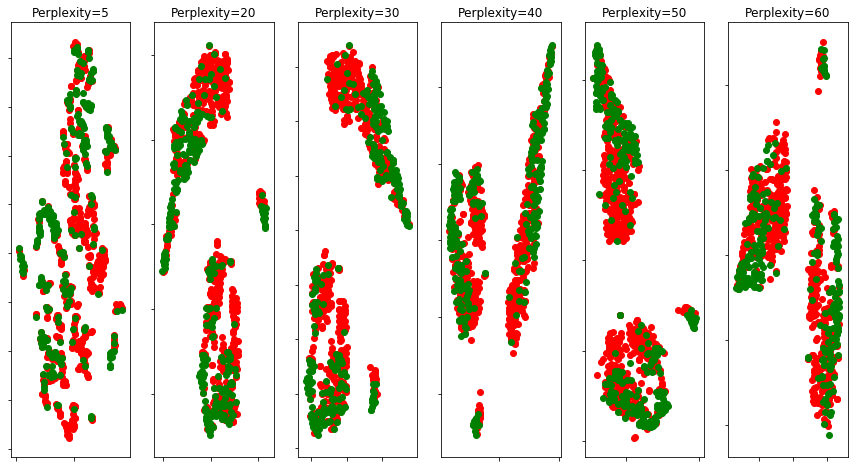

In [3]:
n_components = 2
(fig, subplots) = plt.subplots(1, 6, figsize=(15, 8),squeeze=False)
perplexities = [5, 20, 30, 40,50,60]

red = y == 1
green = y == 2


for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')



plt.show()


### t-SNE for bees_2p

In [7]:
bees=pd.read_csv("https://academic.uprm.edu/eacuna/bees_2p.csv")
X1=bees.iloc[:,3:23]
#dropping two outliers bees 153 y 369
X2=X1.drop([152,368])

In [8]:
X2.describe()

,31m,31a,1m,1a,2m,2a,3m,3a,4m,4a,5m,5a,6m,6a,7m,7a,8m,8a,9m,9a
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,0.028947,0.871053,0.018421,1.568421,0.192105,1.113158,0.368421,1.518421,0.563158,1.644737,0.671053,2.415789,1.100000,2.792105,1.410526,3.636842,1.600000,4.386842,0.128947,1.836842
std,0.233600,1.647483,0.134646,1.872747,1.199138,1.899961,1.546484,2.727206,1.931194,2.805498,1.758419,3.520878,2.695741,3.910805,3.024071,4.922053,3.081651,6.282726,0.694269,5.367223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000
75%,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.000000,4.000000,2.000000,5.000000,2.000000,6.000000,0.000000,2.000000
max,2.000000,15.000000,1.000000,18.000000,19.000000,15.000000,16.000000,22.000000,18.000000,20.000000,13.000000,33.000000,19.000000,24.000000,23.000000,44.000000,22.000000,58.000000,7.000000,57.000000


In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.neighbors import DistanceMetric
from scipy.spatial import distance
kmeans = KMeans(n_clusters=2, random_state=0).fit(X2)
clustlabels=kmeans.labels_
print(clustlabels)

[0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1
 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0
 0 0 0 0 1 0 0 0 1 0]


bees, perplexity=5 in 1.2 sec
bees, perplexity=10 in 1.3 sec
bees, perplexity=15 in 1.3 sec
bees, perplexity=20 in 1.4 sec
bees, perplexity=30 in 1.6 sec
bees, perplexity=40 in 1.9 sec


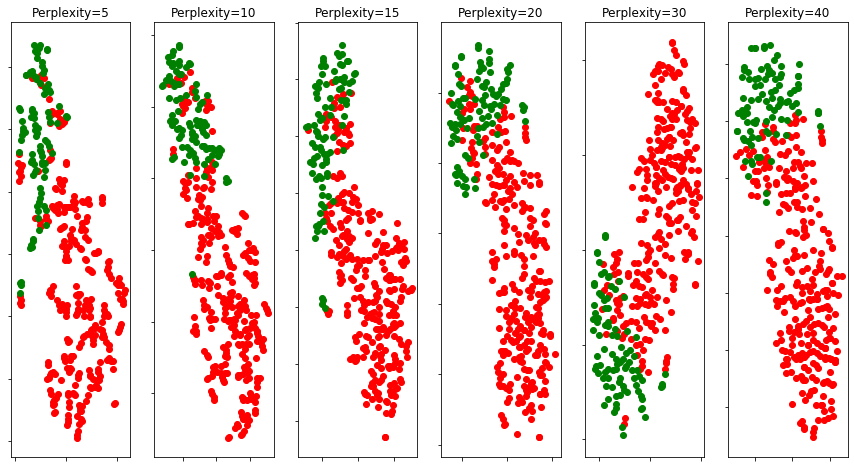

In [10]:
y=clustlabels
n_components = 2
(fig, subplots) = plt.subplots(1, 6, figsize=(15, 8),squeeze=False)
perplexities = [5, 10, 15, 20, 30, 40]

red = y == 0
green = y == 1


for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(X2)
    t1 = time()
    print("bees, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')



plt.show()

### t-SNE for bees_2p after PCA

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
X2 = StandardScaler().fit_transform(X2)
principalComponents = pca.fit_transform(X2)
pcaDF=pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[6.32935333 2.12431006 1.49246472 1.1316136  1.05956205 0.94290329
 0.91486963 0.8504169  0.69296994]
[0.31563486 0.10593599 0.07442686 0.05643178 0.05283869 0.0470211
 0.0456231  0.04240895 0.03455732]
[0.31563486 0.42157085 0.4959977  0.55242949 0.60526817 0.65228927
 0.69791238 0.74032133 0.77487864]


bees, perplexity=5 in 1.1 sec
bees, perplexity=10 in 1.2 sec
bees, perplexity=15 in 1.3 sec
bees, perplexity=20 in 1.4 sec
bees, perplexity=50 in 1.4 sec
bees, perplexity=60 in 1.9 sec


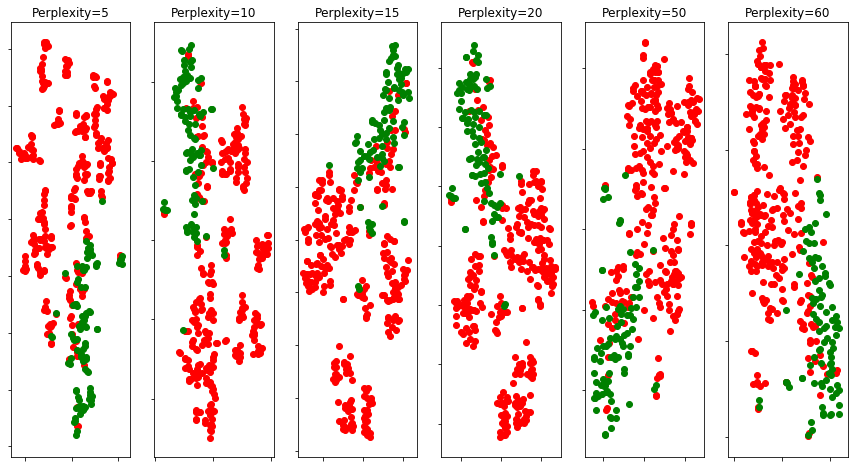

In [12]:
y=clustlabels
n_components = 2
(fig, subplots) = plt.subplots(1, 6, figsize=(15, 8),squeeze=False)
perplexities = [5, 10, 15, 20, 50, 60]

red = y == 0
green = y == 1


for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity)
    Y = tsne.fit_transform(pcaDF)
    t1 = time()
    print("bees, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')



plt.show()

### PCA for bess_2p

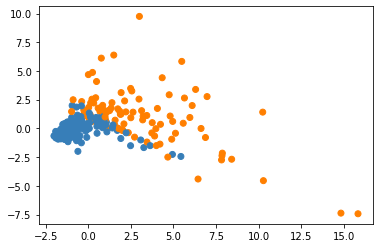

In [13]:
from matplotlib.colors import ListedColormap
from itertools import cycle, islice
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(clustlabels) + 1))))
plt.scatter(pcaDF['PC1'], pcaDF['PC2'],color=colors[clustlabels])
plt.show()